In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

import datetime

In [70]:
fid = '/Users/bell/in_and_outbox/2019/stabeno/jan/c2_winds/NARR_C2_UVAT_1980-2018.csv'

fin = pd.read_csv(fid,parse_dates=['time'],index_col='time')

fin.rename(columns={' AT_21':'AT_21',' WU_422':'WU_422',' WV_423':'WV_423',' index':'index'},inplace=True)

In [30]:
# calculate wind direction and magnitude
#  Wind Direction is defined as 0 in +U direction, 90 in +V, -180/180 in -U and -90 in -V with increasing ccw
fin['magnitude'] = np.sqrt(fin['WU_422']**2 + fin['WV_423']**2)
fin['direction'] = np.rad2deg(np.arctan2(fin['WV_423'],fin['WU_422']))

In [31]:
fin['month'] = fin.index.month_name()

In [32]:
# find values where magnitude is < 2 and make missing (these are calm/variable and will mess up temp averages)
fin.groupby([fin.month,pd.cut(fin.magnitude, [0,2])]).agg(['mean','min','max','count']).to_csv('temp_calm.csv')
fin.groupby([fin.month,pd.cut(fin.magnitude, [0,2])]).agg(['std']).to_csv('temp_calm_std.csv')

#fin.groupby([pd.Grouper(freq='M'),pd.cut(fin.magnitude, [0,2])]).agg(['mean','min','max','count']).to_csv('temp_calm.csv')
#fin.groupby([pd.Grouper(freq='M'),pd.cut(fin.magnitude, [0,2])]).agg(['std']).to_csv('temp_calm_std.csv')

In [33]:
fin[fin['magnitude'] <2] = np.nan

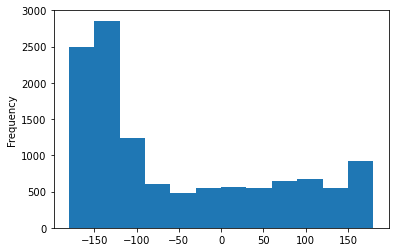

In [34]:
%matplotlib inline
fin.direction.plot.hist(bins=12)

In [48]:
#bins are closed right, open left
bins = [-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180]
fin.groupby([fin.month,pd.cut(fin.direction, bins)]).agg(['mean','min','max','count']).to_csv('temp.csv')
fin.groupby([fin.month,pd.cut(fin.direction, bins)]).agg(['std']).to_csv('temp_std.csv')

#fin.groupby([pd.Grouper(freq='M'),pd.cut(fin.direction, bins)]).agg(['mean','min','max','count']).to_csv('temp.csv')
#fin.groupby([pd.Grouper(freq='M'),pd.cut(fin.direction, bins)]).agg(['std']).to_csv('temp_std.csv')

In [98]:
fin_mean = fin.groupby(fin['index']).mean()
fin_mean.to_csv('1980-2014_AT.csv')

fin_std = fin.groupby(fin['index']).std()
fin_std.to_csv('1980-2014_AT_std.csv')

fin_sem = fin.groupby(fin['index']).sem()
fin_sem.to_csv('1980-2014_AT_sem.csv')


In [99]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

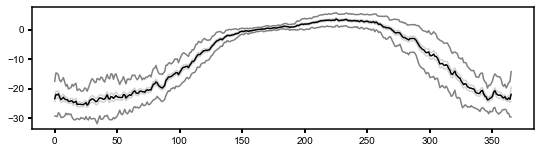

In [100]:
fig = plt.figure(1,figsize=(9,2.25))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(fin_std.index,fin_mean.AT_21+fin_std.AT_21,'grey')
plt.plot(fin_std.index,fin_mean.AT_21-fin_std.AT_21,'grey')
plt.plot(fin_mean.index,fin_mean.AT_21-fin_sem.AT_21,'lightgrey')
plt.plot(fin_mean.index,fin_mean.AT_21+fin_sem.AT_21,'lightgrey')
plt.plot(fin_mean.index,fin_mean.AT_21,'black')


fig.savefig('images/C2_NARR_ATmean_1980-2014.png',dpi=300)



In [96]:
fin['2015-07':'2016-07']['index']

time
2015-07-01    181
2015-07-02    182
2015-07-03    183
2015-07-04    184
2015-07-05    185
             ... 
2016-07-27    208
2016-07-28    209
2016-07-29    210
2016-07-30    211
2016-07-31    212
Name: index, Length: 397, dtype: int64

time
2016-05-01   -2.008392
2016-05-02   -1.942444
2016-05-03   -1.152954
2016-05-04   -1.403473
2016-05-05   -2.981354
2016-05-06   -7.001770
2016-05-07   -7.687805
2016-05-08   -7.029358
2016-05-09   -4.611298
2016-05-10    0.517761
2016-05-11    1.013672
2016-05-12    0.812073
2016-05-13   -0.185974
2016-05-14   -1.829224
2016-05-15   -2.958496
2016-05-16   -2.025848
2016-05-17   -2.718109
2016-05-18   -2.680176
2016-05-19   -2.502777
2016-05-20   -1.350739
2016-05-21   -1.732697
2016-05-22   -0.087738
2016-05-23    0.629944
2016-05-24    0.423065
2016-05-25   -0.029327
2016-05-26   -0.195282
2016-05-27    0.363525
2016-05-28    0.493134
2016-05-29    0.566071
2016-05-30    0.816071
2016-05-31   -0.897186
Name: AT_21, dtype: float64

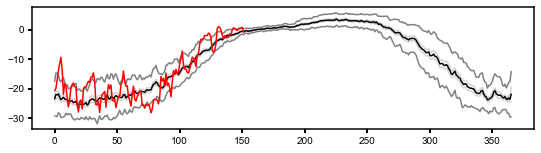

In [113]:
#fin2 = pd.read_csv(fid,sheet_name=1,parse_dates=['time'],index_col='time')

fig = plt.figure(1,figsize=(9,2.25))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)

plt.plot(fin_std.index,fin_mean.AT_21+fin_std.AT_21,'grey')
plt.plot(fin_std.index,fin_mean.AT_21-fin_std.AT_21,'grey')
plt.plot(fin_mean.index,fin_mean.AT_21-fin_sem.AT_21,'lightgrey')
plt.plot(fin_mean.index,fin_mean.AT_21+fin_sem.AT_21,'lightgrey')
plt.plot(fin_mean.index,fin_mean.AT_21,'black')
plt.plot(fin['2016-01':'2016-05']['index'],fin['2016-01':'2016-05']['AT_21'],'red')


fin['2016-05':'2016-05']['AT_21']

In [111]:
np.arange(-30,20)

array([-30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18,
       -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,
        -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,
         9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19])

In [31]:
fid = '/Users/bell/in_and_outbox/2018/stabeno/nov/m8_winds/NARR_M8_UVAT_1980-2014.xlsx'

fin = pd.read_excel(fid,sheet_name=2,parse_dates=['time'],index_col='time')

In [36]:
climo = fin[:'2014'].groupby([fin[:'2014'].index.month, fin[:'2014'].index.day])

In [38]:
climo.mean().to_csv('climo.csv')

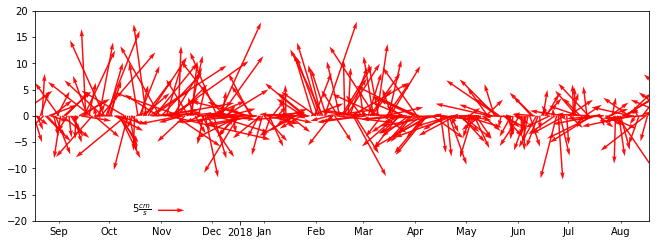

In [65]:
fin2 = pd.read_excel(fid,sheet_name=2,parse_dates=['time'],index_col='time')

fig = plt.figure(1,figsize=(11,8.5))
ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
q = ax1.quiver(fin2.index,0,fin2.WU_anom.rolling('3d').mean(),fin2.WV_anom.rolling('3d').mean(),color='r',units='y',scale_units='y',
                 scale = 1,alpha=.95)
qk = plt.quiverkey(q,0.2, 0.05, 5,r'$5 \frac{cm}{s}$',labelpos='W',
             fontproperties={'weight': 'bold'})
ax1.set_ylim([-20,20])
ax1.set_xlim('2017-9','2018-9')
ax1.xaxis.set_major_locator(YearLocator(month=1,day=1))
ax1.xaxis.set_minor_locator(MonthLocator(bymonthday=15))
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))

fig.savefig('3dfiltered_WindAnom_.png',dpi=300)

In [ ]:
din